# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [7]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
penguins = load_penguins ()

In [8]:
penguins_new = pd.get_dummies(penguins, columns=["species", "island", "sex"], drop_first=True)
penguins_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

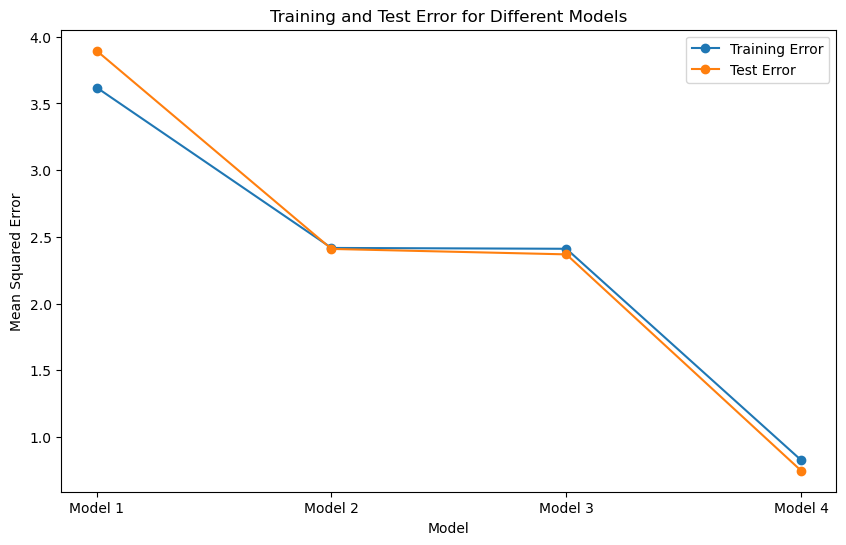

In [6]:
#prepare the data
X = penguins_new.drop("bill_depth_mm", axis=1)
y = penguins_new["bill_depth_mm"]

#remove  missing values
X = X[y.notna()]
y = y[y.notna()]

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fill missing values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

#predictors
predictors_sets = [
    ["bill_length_mm"],
    ["bill_length_mm", "flipper_length_mm"],
    ["bill_length_mm", "flipper_length_mm", "body_mass_g"],
    ["bill_length_mm", "flipper_length_mm", "species_Chinstrap", "species_Gentoo", "island_Dream", "island_Torgersen", "sex_Male"]
]

#initialize
train_errors = []
test_errors = []

#loop through predictors
for predictors in predictors_sets:
    available_predictors = [col for col in predictors if col in X_train.columns]
    
    #fit the model
    model = LinearRegression()
    model.fit(X_train[available_predictors], y_train)
    
    #make predictions
    y_train_pred = model.predict(X_train[available_predictors])
    y_test_pred = model.predict(X_test[available_predictors])
    
    #calculate errors
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

#plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), train_errors, label="Training Error", marker='o')
plt.plot(range(1, 5), test_errors, label="Test Error", marker='o')
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Error for Different Models")
plt.legend()
plt.xticks(range(1, 5), ["Model 1", "Model 2", "Model 3", "Model 4"])
plt.show()
